# 12 months Sales Data Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

Read the sales data file and merge the 12 months data, into a singe file

In [3]:
files= [file for file in os.listdir('D:\Data Science\Data sets\Sales\SalesAnalysis\Sales_Data')]
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [4]:
Merged_df=pd.DataFrame()
for file in files:
    df=pd.read_csv("D:/Data Science/Data sets/Sales/SalesAnalysis/Sales_Data/" +file)
    Merged_df =  pd.concat([Merged_df,df])
Merged_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
Merged_df.to_csv("D:\Data Science\Data sets\Sales\SalesAnalysis\All_months_data.csv", index=False)

In [6]:
All_months_data= pd.read_csv("D:\Data Science\Data sets\Sales\SalesAnalysis\All_months_data.csv")

In [7]:
All_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [11]:
All_months_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [12]:
All_months_data.shape

(186850, 6)

# Data Cleaning

##Checking for null values

In [8]:
All_months_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

##Deleting all the null rows

In [9]:
All_months_data.dropna(inplace= True)

# Best month in terms of sales

In [10]:
All_months_data['Month'] = All_months_data['Order Date'].str[0:2]

In [11]:
All_months_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04


In [12]:
All_months_data['Month'].value_counts()

12    24984
10    20282
04    18279
11    17573
05    16566
03    15153
07    14293
06    13554
02    11975
08    11961
09    11621
01     9709
Or      355
Name: Month, dtype: int64

We need to clean the "Or feature" in the "Order Date", "Month" Columns

In [13]:
df_Or = All_months_data[All_months_data['Month']=="Or"]
df_Or

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [14]:
Clean_data= All_months_data[(All_months_data['Order Date'].str[0:2] !="Order Date") & (All_months_data['Month'] != 'Or')]

In [15]:
Clean_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [22]:
df_Or= Clean_data['Month']=="Or"
df_Or.sum()


0

In [23]:
Clean_data['Month'] = Clean_data['Month'].astype('int64')

C:\Users\cbv\AppData\Local\Temp\ipykernel_14180\3451808558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean_data['Month'] = Clean_data['Month'].astype('int64')


In [25]:
Monthly_sales=Clean_data['Month'].value_counts()
Monthly_sales

12    24984
10    20282
4     18279
11    17573
5     16566
3     15153
7     14293
6     13554
2     11975
8     11961
9     11621
1      9709
Name: Month, dtype: int64

<Axes: xlabel='MONTHS', ylabel='MONTHLY OCCURANCES'>

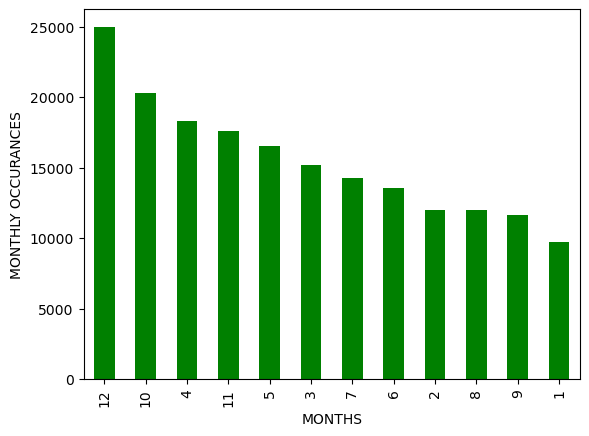

In [26]:
Monthly_sales.plot(kind='bar', color='green', xlabel = 'MONTHS', ylabel='MONTHLY OCCURANCES')

#We need to add a new column which is a multiplication of the "Quantity Ordered" and "Price Each" columns

In [17]:
Clean_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

We need to change the two columns from 'String' to 'integer'

In [18]:
Clean_data['Quantity Ordered'] = pd.to_numeric(Clean_data['Quantity Ordered'])
Clean_data['Price Each'] = pd.to_numeric(Clean_data['Price Each'])

C:\Users\cbv\AppData\Local\Temp\ipykernel_9592\2423261872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean_data['Quantity Ordered'] = pd.to_numeric(Clean_data['Quantity Ordered'])
C:\Users\cbv\AppData\Local\Temp\ipykernel_9592\2423261872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean_data['Price Each'] = pd.to_numeric(Clean_data['Price Each'])


In [19]:
Clean_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                object
dtype: object

In [20]:
Clean_data['Total Sales'] = Clean_data['Quantity Ordered']* Clean_data['Price Each']

C:\Users\cbv\AppData\Local\Temp\ipykernel_9592\1021481708.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean_data['Total Sales'] = Clean_data['Quantity Ordered']* Clean_data['Price Each']


In [21]:
Clean_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


In [24]:
Dataset_Numbers=Clean_data.groupby('Month').sum('numeric_only')
Dataset_Numbers

,Quantity Ordered,Price Each,Total Sales
Month,,,
01,10903,1811768.38,1822256.73
02,13449,2188884.72,2202022.42
03,17005,2791207.83,2807100.38
04,20558,3367671.02,3390670.24
05,18667,3135125.13,3152606.75
06,15253,2562025.61,2577802.26
07,16072,2632539.56,2647775.76
08,13448,2230345.42,2244467.88
09,13109,2084992.09,2097560.13


<Axes: xlabel='Month'>

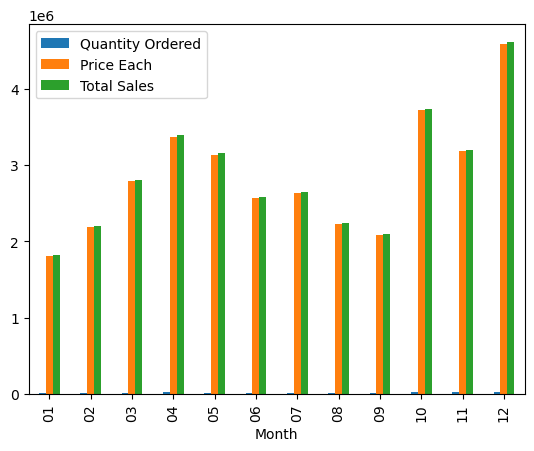

In [23]:
Dataset_Numbers.plot(kind='bar')



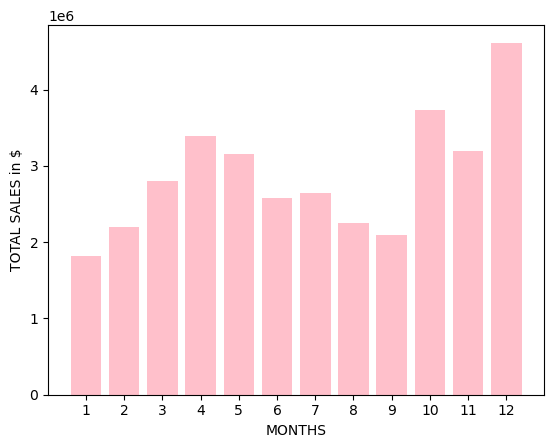

In [25]:
months= range(1,13)
plt.bar(months, Dataset_Numbers['Total Sales'], color='pink')
plt.xticks(months)
plt.ylabel('TOTAL SALES in $')
plt.xlabel('MONTHS')
plt.show()

Solution: December was the best month with higher sales

In [26]:
Clean_data['City']=Clean_data['Purchase Address'].apply(lambda x: x.split(',')[1] + ' '+ (x.split(',')[2].split(' ')[1]))

C:\Users\cbv\AppData\Local\Temp\ipykernel_9592\1904782298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean_data['City']=Clean_data['Purchase Address'].apply(lambda x: x.split(',')[1] + ' '+ (x.split(',')[2].split(' ')[1]))


In [27]:
Clean_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles CA


## City with higher Sales in the year

In [167]:
City_sales=Clean_data.groupby('City').sum('numeric_only')['Total Sales']
City_sales

City
 Atlanta GA          2795498.58
 Austin TX           1819581.75
 Boston MA           3661642.01
 Dallas TX           2767975.40
 Los Angeles CA      5452570.80
 New York City NY    4664317.43
 Portland ME          449758.27
 Portland OR         1870732.34
 San Francisco CA    8262203.91
 Seattle WA          2747755.48
Name: Total Sales, dtype: float64

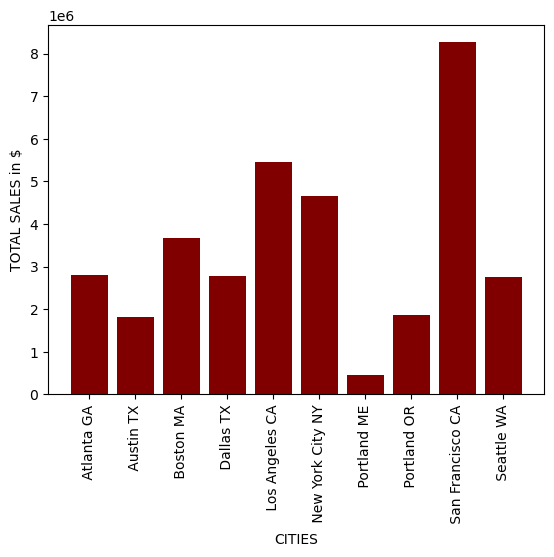

In [168]:

Cities= [city for city, df in Clean_data.groupby('City')]
plt.bar(Cities, City_sales, color='#800000')
plt.xticks(Cities, rotation='vertical', size='10')
plt.ylabel('TOTAL SALES in $')
plt.xlabel('CITIES')
plt.show()

####San Fransisco has higher sales than any other city

# What are the busy hours in a day, when there are often more sales, and more clients?

In [30]:
Clean_data['Order Date'] = pd.to_datetime(Clean_data['Order Date'])

C:\Users\cbv\AppData\Local\Temp\ipykernel_9592\2004933812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean_data['Order Date'] = pd.to_datetime(Clean_data['Order Date'])


In [32]:
Clean_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles CA


In [33]:
Clean_data['Hour']= Clean_data['Order Date'].dt.hour

C:\Users\cbv\AppData\Local\Temp\ipykernel_9592\1201474277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean_data['Hour']= Clean_data['Order Date'].dt.hour


In [34]:
Clean_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles CA,9


In [115]:
Clean_data.sort_values(by = 'Hour', ascending = True)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour
186849,259357,USB-C Charging Cable,1,11.95,2019-09-30 00:18:00,"250 Meadow St, San Francisco, CA 94016",9,11.95,San Francisco CA,0
135202,208095,AA Batteries (4-pack),1,3.84,2019-05-08 00:23:00,"357 Walnut St, San Francisco, CA 94016",5,3.84,San Francisco CA,0
135225,208117,USB-C Charging Cable,1,11.95,2019-05-24 00:45:00,"159 Spruce St, San Francisco, CA 94016",5,11.95,San Francisco CA,0
135231,208123,USB-C Charging Cable,1,11.95,2019-05-06 00:58:00,"137 Johnson St, Boston, MA 02215",5,11.95,Boston MA,0
18819,237092,Wired Headphones,1,11.99,2019-08-20 00:37:00,"808 1st St, Boston, MA 02215",8,11.99,Boston MA,0
...,...,...,...,...,...,...,...,...,...,...
99697,217604,34in Ultrawide Monitor,1,379.99,2019-06-11 23:18:00,"971 Spruce St, Los Angeles, CA 90001",6,379.99,Los Angeles CA,23
143225,284626,AA Batteries (4-pack),1,3.84,2019-11-23 23:34:00,"224 12th St, New York City, NY 10001",11,3.84,New York City NY,23
168697,272630,iPhone,1,700.00,2019-10-30 23:11:00,"644 Church St, San Francisco, CA 94016",10,700.00,San Francisco CA,23
133063,206044,AAA Batteries (4-pack),2,2.99,2019-05-28 23:13:00,"75 River St, San Francisco, CA 94016",5,5.98,San Francisco CA,23


In [36]:
Clean_data.groupby('Hour').sum('numeric_only')

,Quantity Ordered,Price Each,Total Sales
Hour,,,
0,4428,709296.70,713721.27
1,2619,458490.00,460866.88
2,1398,233833.64,234851.44
3,928,144726.42,145757.89
4,937,162058.18,162661.01
5,1493,229621.21,230679.82
6,2810,445000.11,448113.00
7,4556,740568.11,744854.12
8,7002,1185970.62,1192348.97


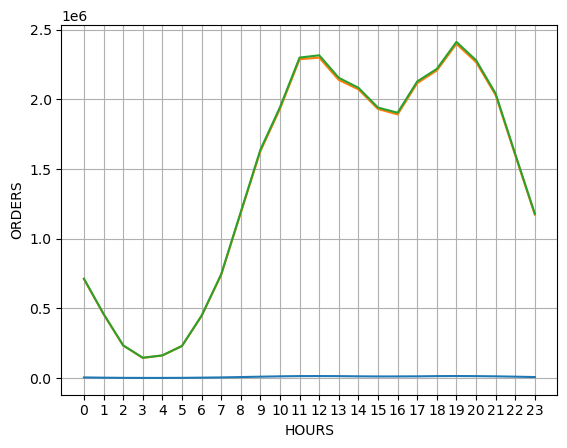

In [37]:
hours=[hour for hour, df in Clean_data.groupby('Hour')]
plt.plot(hours, Clean_data.groupby('Hour').sum('numeric_only'))
#plt.plot(hours, Clean_data.groupby('Hour')['Total Sales']
plt.xticks(hours)
plt.grid()
plt.xlabel('HOURS')
plt.ylabel('ORDERS')
plt.legend
plt.show()

##Peak hours are 11h to 12h, and 19h.

# Product that was sold the most

In [38]:
Clean_data['Product'].unique().shape

(19,)

In [169]:
products=Clean_data.groupby('Product').sum('numeric_only')
prod = Clean_data.groupby('Product')['Product']
pro=products[['Quantity Ordered','Total Sales']]
products


,Quantity Ordered,Price Each,Total Sales,Hour
Product,,,,
20in Monitor,4129,451068.99,454148.71,58764
27in 4K Gaming Monitor,6244,2429637.70,2435097.56,90916
27in FHD Monitor,7550,1125974.93,1132424.50,107540
34in Ultrawide Monitor,6199,2348718.19,2355558.01,89076
AA Batteries (4-pack),27635,79015.68,106118.40,298342
AAA Batteries (4-pack),31017,61716.59,92740.83,297332
Apple Airpods Headphones,15661,2332350.00,2349150.00,223304
Bose SoundSport Headphones,13457,1332366.75,1345565.43,192445
Flatscreen TV,4819,1440000.00,1445700.00,68815


In [170]:
pro

,Quantity Ordered,Total Sales
Product,,
20in Monitor,4129,454148.71
27in 4K Gaming Monitor,6244,2435097.56
27in FHD Monitor,7550,1132424.50
34in Ultrawide Monitor,6199,2355558.01
AA Batteries (4-pack),27635,106118.40
AAA Batteries (4-pack),31017,92740.83
Apple Airpods Headphones,15661,2349150.00
Bose SoundSport Headphones,13457,1345565.43
Flatscreen TV,4819,1445700.00


<Axes: xlabel='Product'>

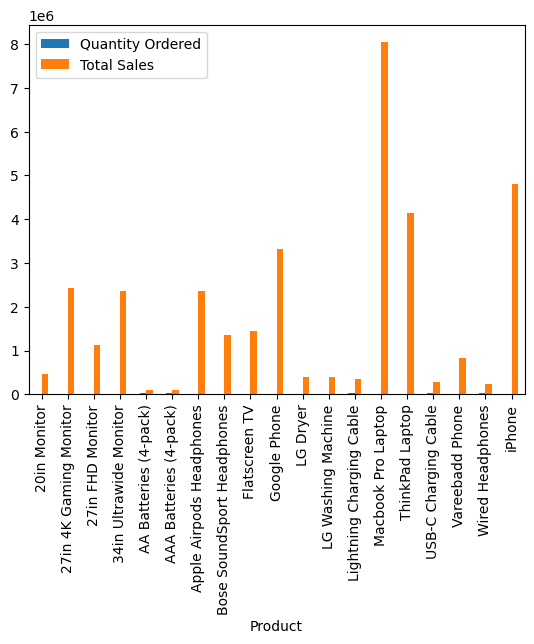

In [171]:
pro.plot(kind='bar')

<Axes: xlabel='Product'>

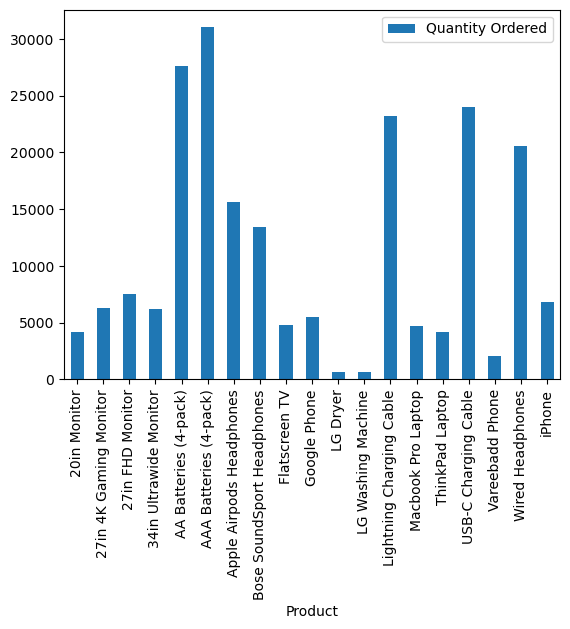

In [158]:
Qty=pro[['Quantity Ordered']]
Qty.plot(kind='bar')

Product with high sales is "Mackbook Pro", the highly sold product (in terms of Quantity), is "AAA Batteries"

##Looking at the graph, we can see LG dryers and Washinng machines are less sold, we need to dive in and analyse the graph, to see if the prices are the reasons for the most sold and the less ones.

In [143]:
prices= Clean_data.groupby('Product')['Price Each'].mean()
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

C:\Users\cbv\AppData\Local\Temp\ipykernel_9592\127048530.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(Qty, rotation='vertical', size=8)


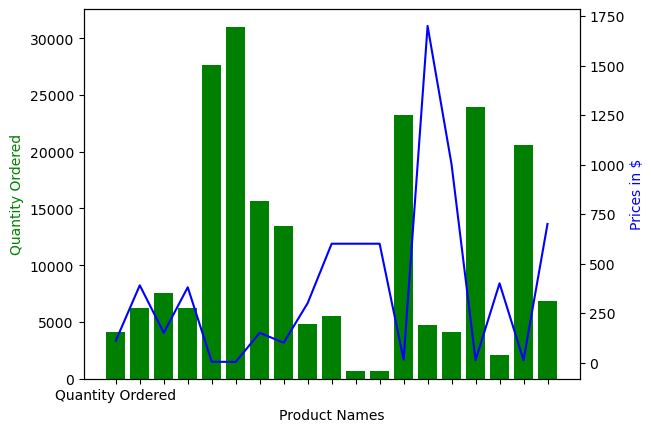

In [165]:
product_group= Clean_data.groupby('Product')
quantity_ordered= product_group.sum('numeric_only')['Quantity Ordered']

products= [product for product, df in product_group]

prices= Clean_data.groupby('Product')['Price Each'].mean()

fig, ax1=plt.subplots()

ax2=ax1.twinx()

ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices,'b-')

ax1.set_xlabel('Product Names')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Prices in $', color='b')
ax2.set_xticklabels(Qty, rotation='vertical', size=8)
plt.show()

#With the two graphs, we can easly see that the most and least sold out  items are cheaper and expensive respectively.

# What is the average Sales by city?

In [166]:
Clean_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour,Same_purch
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas TX,8,USB-C Charging Cable
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston MA,22,Bose SoundSport Headphones


In [51]:
Clean_data[['City','Quantity Ordered','Total Sales']].groupby('City').mean('numeric_only')

,Quantity Ordered,Total Sales
City,,
Atlanta GA,1.115651,187.856903
Austin TX,1.125997,183.703357
Boston MA,1.130129,183.688272
Dallas TX,1.128880,186.772969
Los Angeles CA,1.124438,184.177362
New York City NY,1.122849,187.502711
Portland ME,1.120163,183.200925
Portland OR,1.129171,186.886348
San Francisco CA,1.123111,184.704550


# Which day did we have high sales?

In [190]:
Clean_data['Day']= Clean_data['Order Date'].dt.day

C:\Users\cbv\AppData\Local\Temp\ipykernel_14180\1146195985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean_data['Day']= Clean_data['Order Date'].dt.day


In [186]:
Clean_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour,Day
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,19
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,7


In [196]:
Daily_status=Clean_data.groupby('Day').sum('numeric_only')
Daily_S=Daily_status[['Quantity Ordered']]
Daily_S

,Quantity Ordered
Day,
1,6867
2,6962
3,6534
4,6813
5,6816
6,6778
7,6779
8,6824
9,6836


<Axes: xlabel='Day'>

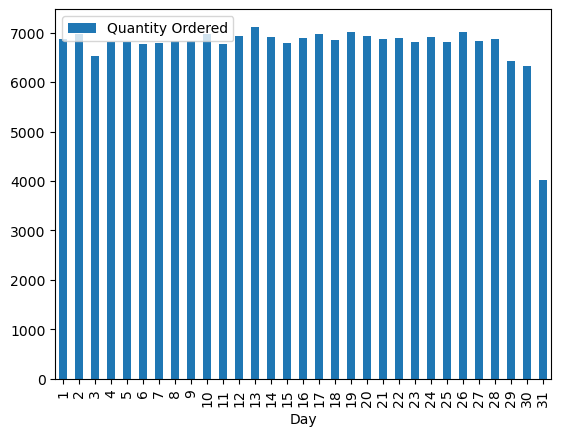

In [228]:
Daily_S.plot(kind='bar')

In [202]:
Daily_status=Clean_data.groupby('Day').sum('numeric_only')
Daily_S2=Daily_status[['Total Sales']]
Daily_S2

,Total Sales
Day,
1,1166319.25
2,1137457.04
3,1074432.90
4,1163857.72
5,1135284.73
6,1151956.09
7,1094796.63
8,1107963.49
9,1169250.43


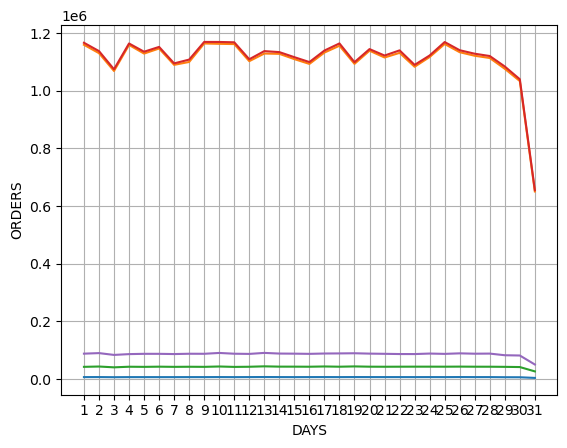

In [226]:
days=[day for day, df in Clean_data.groupby('Day')]
plt.plot(days, Clean_data.groupby('Day').sum('numeric_only'))
#plt.plot(hours, Clean_data.groupby('Hour')['Total Sales']
plt.xticks(days)
plt.grid()
#plt.figure(figsize=(20,20))
plt.xlabel('DAYS')
plt.ylabel('ORDERS')
plt.legend
plt.show()

##31st seems to be the day with least sales. This is due to the fact that it occurs on 6 months a year only.

# Products that are sold together often

In [60]:
Clean_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles CA,9


In [61]:
# Products that ar sold together will have same order ID, Same Purchase Address or City, Same order date or day/hour.

In [75]:
Clean_data[Clean_data['Order ID'].duplicated(keep=False)]
Clean_data['Same_purch']=Clean_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


C:\Users\cbv\AppData\Local\Temp\ipykernel_9592\2261020331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean_data['Same_purch']=Clean_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [76]:
Clean_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour,Same_purch
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas TX,8,USB-C Charging Cable
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston MA,22,Bose SoundSport Headphones
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles CA,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles CA,14,"Google Phone,Wired Headphones"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles CA,9,Wired Headphones
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",09,8.97,Los Angeles CA,20,AAA Batteries (4-pack)
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",09,700.00,San Francisco CA,16,iPhone
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",09,700.00,San Francisco CA,7,iPhone
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",09,379.99,San Francisco CA,17,34in Ultrawide Monitor


In [81]:
df=Clean_data[['Order ID','Same_purch']].drop_duplicates()
df

,Order ID,Same_purch
0,176558,USB-C Charging Cable
2,176559,Bose SoundSport Headphones
3,176560,"Google Phone,Wired Headphones"
5,176561,Wired Headphones
6,176562,USB-C Charging Cable
...,...,...
186845,259353,AAA Batteries (4-pack)
186846,259354,iPhone
186847,259355,iPhone
186848,259356,34in Ultrawide Monitor


In [134]:
from itertools import combinations
from collections import Counter

In [137]:
count = Counter()

for row in df['Same_purch']:
    row_list= row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

'iPhone', 'Lightning Charging Cable' are the ones that are mostly sold in pair.